# Credit Card Fraud Detection - Classification
## Anonymized credit card transactions labeled as fraudulent or genuine
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br>

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# load data
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

## EDA - Exploratory Data Analysis

In [3]:
df.head() # first 5 entries

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum() # checking for missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We have a total amount of 284807 samples, 31 features and no missing values

In [6]:
df.describe() # statistical infos about features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.corr() # the correlation between the features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


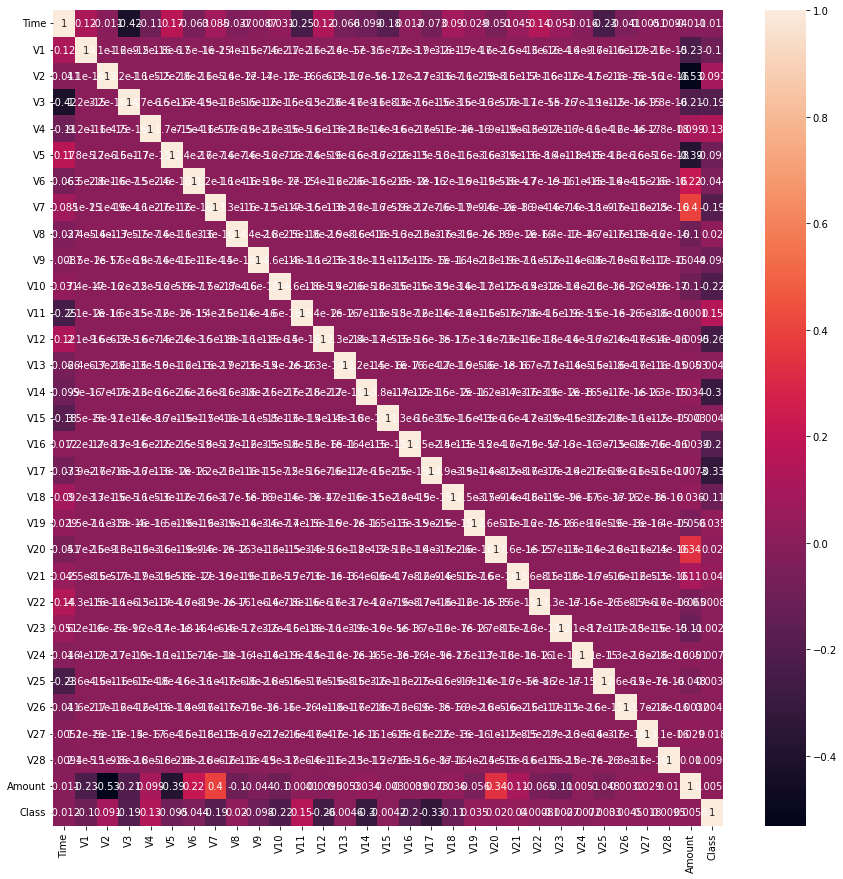

In [8]:
# Correlation of the features shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

### Data Vizualisation

We show all columns in hisptlots to get more insight about the features.

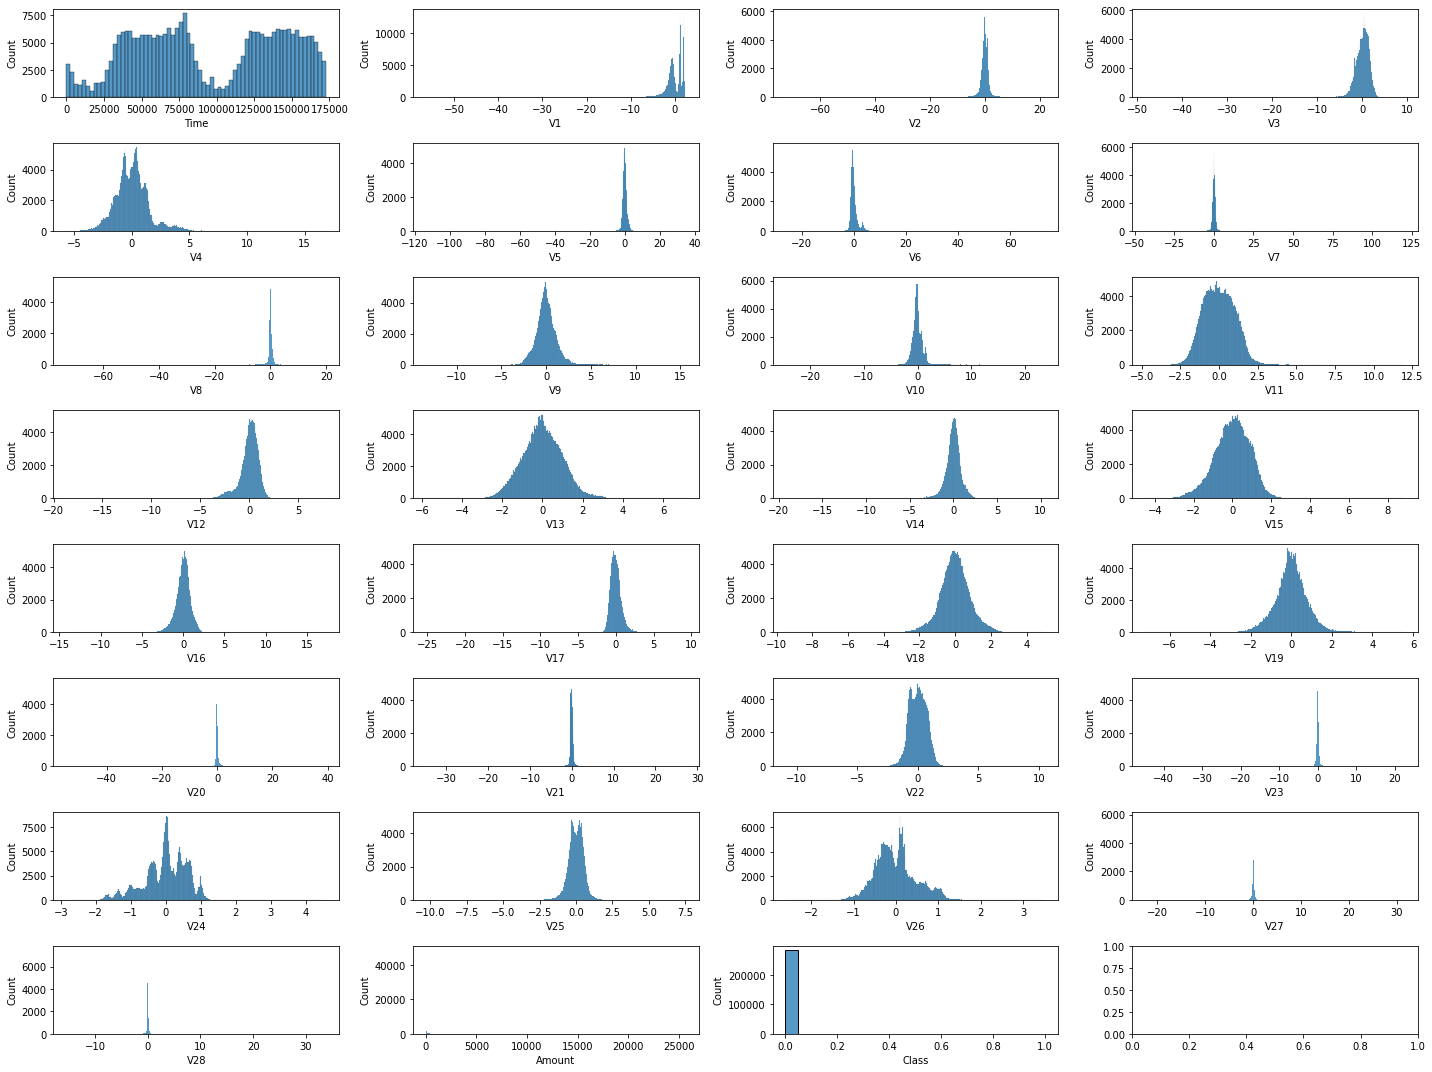

In [9]:
# Create a figure and a set of subplots with as many rows as needed and 4 columns
num_rows = (len(df.columns) + 2) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20,15))

# Create a histplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()

Getting more insights of the "Time", "Amount" and "Class" Features.

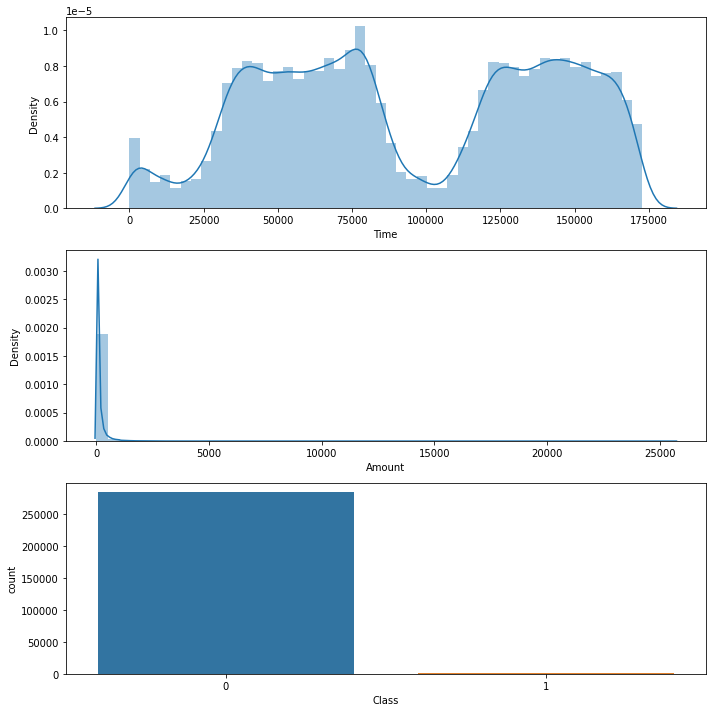

In [10]:
# plotting the Time, Amount and Class columns
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(3,1,1)
sns.distplot(df['Time'])
fig.add_subplot(3,1,2)
sns.distplot(df['Amount'])
fig.add_subplot(3,1,3)
sns.countplot(df['Class'])
plt.tight_layout();

We can see that our Data is imbalanced. We will use _SMOTE_ for oversampling to deal with this imbalanced data.

## Data Preprocessing
We are going to use SMOTE for oversampling, than with PCA we are going to reduce the dimensions and with standardizing we try to achieve better perfomance.

**SMOTE (Synthetic Minority Over-sampling Technique)** is an algorithm that is used to address class imbalance in a dataset. Imbalanced Data can lead to poor performance of machine learning models on the minority class, because the model may be biased towards the majority class. SMOTE works by synthesizing new examples for the minority class.

Using **Principal component analysis (PCA)** to reduce the dimension of the features:<br>
The main idea behind PCA is that the dataset can often be represented with fewer dimensions while still retaining most of the information. For example, our dataset  have many features (dimensions) that are correlated with one another, so it can be represented with fewer features without much loss of information.

**StandardScaler** is a preprocessing technique that is often used in machine learning pipelines to standardize the features of a dataset. It scales the features of the dataset so that they have zero mean and unit variance. Standardizing the data can make it easier for machine learning algorithms to learn from the data, because the features are on a similar scale and do not have large differences in range.

Note: Thanks to ChatGPT for the descriptions of Smote, PCA and StandarScaler.

## Modeling


In [11]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    from sklearn.decomposition import PCA
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y, get dummies (sparse matrix - object to integer)
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    #x=pd.get_dummies(x,drop_first=True)
    # Using SMOTE for oversampling imbalanced data
    sm = SMOTE(random_state=42)
    x, y = sm.fit_resample(x, y)
    # Using PCA to reduce dimension of features
    pca=PCA(n_components=2) 
    x=pca.fit_transform(x) 
    # Scale the dataset
    scaler.fit(x)
    x = scaler.transform(x)
    # split train and test data
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    # create an instance of each classification algorithm
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    #SVC=SVC() 
    D=DecisionTreeClassifier()
    #R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,D,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [12]:
classification_funct(df,"Class")  # call classification function and see results in a Dataframe

,f1_score,recall_score,precision_score,accuracy_score
DecisionTreeClassifier,0.939630,0.946837,0.932532,0.939046
KNeighborsClassifier,0.890910,0.924231,0.859907,0.886605
XGBClassifier,0.873666,0.874087,0.873244,0.873353
BernoulliNB,0.418972,0.320310,0.605467,0.554913
GaussianNB,0.612418,0.714810,0.535684,0.546718
LogisticRegression,0.556032,0.576067,0.537343,0.539120


The best perfomance showed the DecisionTreeClassifier with **f1: 93,96%, recall: 94,68%, precision: 93,25% and accuracy: 93,9%** followed by the KNeighboursClassifier.

I had some issues with SCV and RandomForestClassifier because after letting the code run for almost half a day I couldn't get results, so I took them out of the function. Maybe if you know why this is you could leave a comment to let me and other Kagglers who are also not so experienced like me have a better understanding for this. Thank you in advance.

## Using Deeplearning

In [13]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Build the model
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sigmoid for classification

In [15]:
#compile model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [16]:
# assign x and y 
x,y=df.drop("Class",axis=1),df[["Class"]]

In [17]:
model.fit(x,y,epochs=10,batch_size=50,verbose=1) # fit model

2022-12-21 20:40:16.977355: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
5697/5697 [==============================] - 41s 7ms/step - loss: 39.9236 - accuracy: 0.9946
Epoch 2/10
5697/5697 [==============================] - 40s 7ms/step - loss: 0.1366 - accuracy: 0.9974
Epoch 3/10
5697/5697 [==============================] - 40s 7ms/step - loss: 0.1825 - accuracy: 0.9976
Epoch 4/10
5697/5697 [==============================] - 40s 7ms/step - loss: 0.7198 - accuracy: 0.9965
Epoch 5/10
5697/5697 [==============================] - 41s 7ms/step - loss: 0.6110 - accuracy: 0.9973
Epoch 6/10
5697/5697 [==============================] - 40s 7ms/step - loss: 0.2869 - accuracy: 0.9977
Epoch 7/10
5697/5697 [==============================] - 43s 8ms/step - loss: 0.4240 - accuracy: 0.9976
Epoch 8/10
5697/5697 [==============================] - 42s 7ms/step - loss: 0.2369 - accuracy: 0.9976
Epoch 9/10
5697/5697 [==============================] - 39s 7ms/step - loss: 0.1084 - accuracy: 0.9978
Epoch 10/10
5697/5697 [==============================] - 40s 7ms/step - 

In [18]:
model.summary() # get a summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               15872     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 804,353
Trainable params: 804,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
scores=model.evaluate(x,y)

8901/8901 [==============================] - 18s 2ms/step - loss: 0.0135 - accuracy: 0.9983


In [20]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 99.83%


We have an **Accuracy of 99,83%** using deep learning with 10 epochs.